In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names1880 = pd.read_csv('/Users/AnhHuynh/Documents/Python/Python Projects/US Baby Names/yob1880.txt',
                        names=['name','gender','births'])

In [3]:
names1880

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
#Since the dataset is split into files by year, first thing to do is to assemble all the dataset into a single Dataframe
#and add year field. We can do this by using concat

In [5]:
years=range(1880,2011)

In [6]:
pieces = []
columns = ['name','sex','birth']

In [7]:
for year in years:
    path = '/Users/AnhHuynh/Documents/Python/Python Projects/US Baby Names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year']=year
    pieces.append(frame)

In [8]:
#Concatenate everything into a single dataframe
names = pd.concat(pieces, ignore_index=True)

In [9]:
names

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [10]:
#Calculate number of births by year and by sex
total_births = names.pivot_table('birth',index='year',columns='sex',aggfunc='sum')

In [11]:
total_births.tail()

sex,F,M
year,,
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995
2009,1835873,1982310
2010,1776223,1917416


Text(0.5, 1.0, 'Births by gender and year')

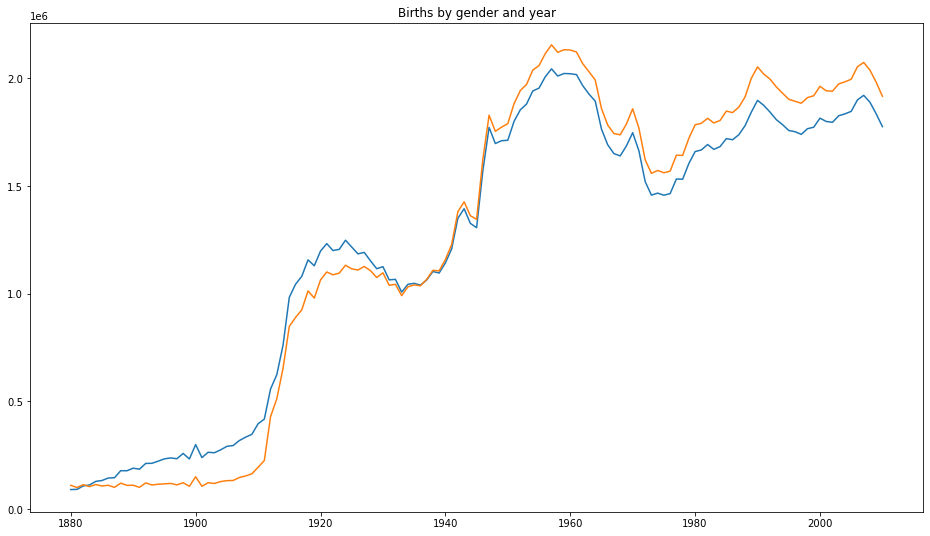

In [12]:
f = plt.figure()
f.set_figheight(9)
f.set_figwidth(16)

plt.plot(total_births)
plt.title('Births by gender and year')



In [13]:
#Create a column called prop to find the fraction of babies given each name relative to the total number of births. 
# A prop of 0.02 would indicate that 2 out of every 100 babies were given a particular name. We group by year and sex, and add the new column to each group

In [14]:
def add_group(group):
    group['prop'] = group.birth / group.birth.sum()
    return group
names = names.groupby(['year','sex']).apply(add_group)

In [15]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692391,Zymaire,M,5,2010,0.000003
1692392,Zyonne,M,5,2010,0.000003
1692393,Zyquarius,M,5,2010,0.000003
1692394,Zyran,M,5,2010,0.000003


In [16]:
names.groupby(['year','sex']).prop.sum() #We do sanity check to ensure proportion add up to 1

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [17]:
#Get 1000 names for each sex/year combination

def top_1000(group):
    return group.sort_values(by='birth',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(top_1000)
top1000.reset_index(inplace=True,drop=True)

In [18]:
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


## **Analyzing Naming Trends** ##

In [19]:
#Split Top 1000 into boys and girls
boys = top1000[top1000['sex']=='M']
girls = top1000[top1000['sex']=='F']

In [20]:
total_births = top1000.pivot_table('birth',index='year',columns='name',aggfunc='sum')

In [21]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3745.0,NaN,8302.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5153.0,2857.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3959.0,NaN,8942.0,NaN,NaN,314.0,NaN,349.0,468.0,...,NaN,4936.0,3039.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,957.0,4042.0,219.0,8542.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3448.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

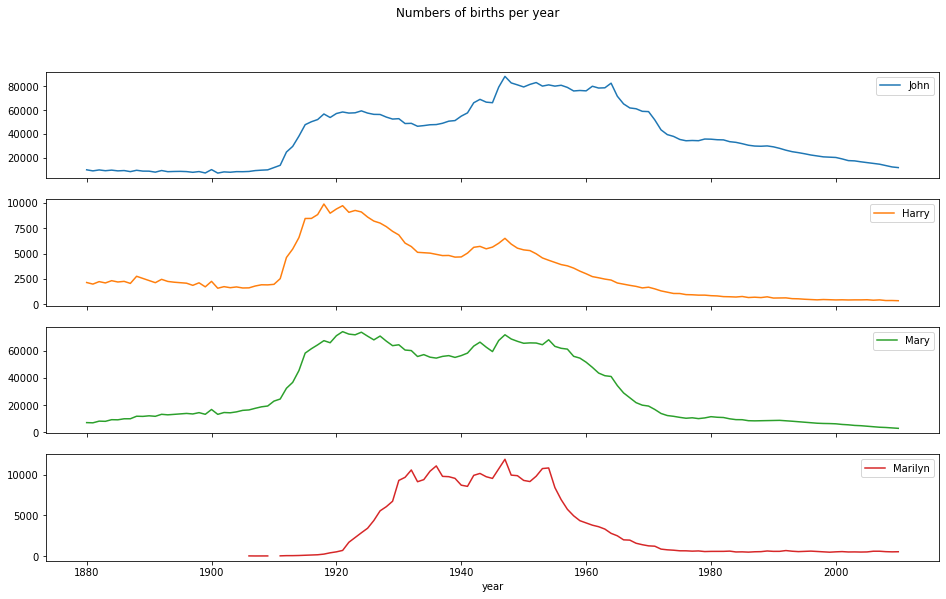

In [22]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots = True, figsize=(16,9),grid=False,title="Numbers of births per year")

## **Measuring the increase in naming diversity** ##

In [23]:
#We hypothesize that fewer parents are choosing common names for their children.
#To check the hypothesis, we can use the proportion of births of top 1000 most popular names

In [24]:
proportion = top1000.pivot_table('prop',index='year',columns= 'sex',aggfunc='sum')

In [25]:
proportion

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753036,0.860285
2007,0.745834,0.855078
2008,0.740803,0.849967


In [26]:
import matplotlib.pylab as pylab

In [27]:
params = {'legend.fontsize': 'small',
          'figure.figsize': (16,9),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large'}
pylab.rcParams.update(params)

<AxesSubplot:title={'center':'Sum of proportion by top 1000 most popular name'}, xlabel='year'>

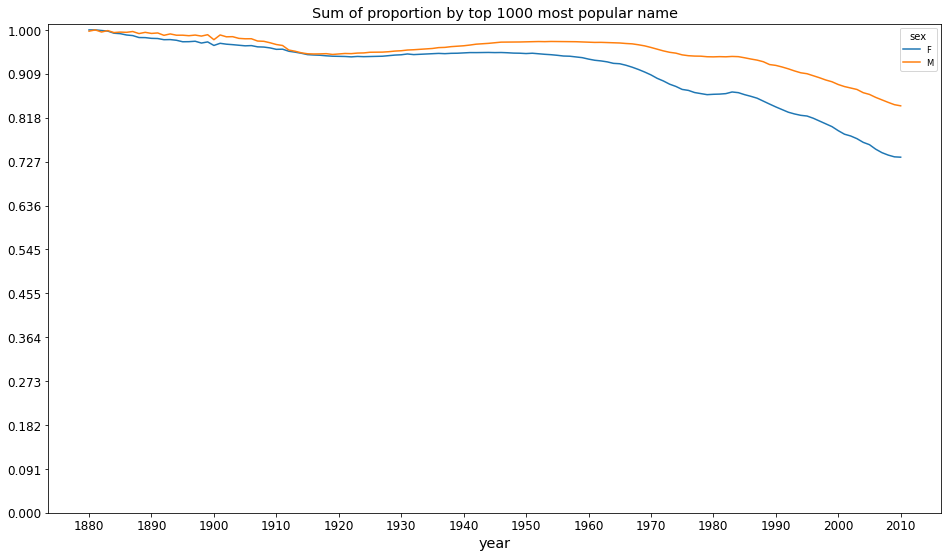

In [28]:
proportion.plot(yticks = np.linspace(0,1,12),xticks=range(1880,2011,10),title="Sum of proportion by top 1000 most popular name")

#### This graph demonstrates that indeed, there is an increase in name diversity (decreasing in proportion of most popular names) ####

In [29]:
#We want to know the proportion of popular boy's names in top 50% of births
df = boys[boys.year == 2010]

In [30]:
df

,name,sex,birth,year,prop
260876,Jacob,M,22139,2010,0.011546
260877,Ethan,M,18008,2010,0.009392
260878,Michael,M,17366,2010,0.009057
260879,Jayden,M,17191,2010,0.008966
260880,William,M,17060,2010,0.008897
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [31]:
#We want to find out how many of most popular names it take to reach 50%
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [32]:
prop_cumsum

260876    0.011546
260877    0.020938
260878    0.029995
260879    0.038961
260880    0.047858
            ...   
261871    0.842393
261872    0.842495
261873    0.842597
261874    0.842699
261875    0.842801
Name: prop, Length: 1000, dtype: float64

In [33]:
prop_cumsum.values.searchsorted(0.5)

116

In [34]:
##Now we can apply this method to each birth year and sex

def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex') #unstack() used to pivot a level of (necessarity hierarchical) index labels

In [35]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

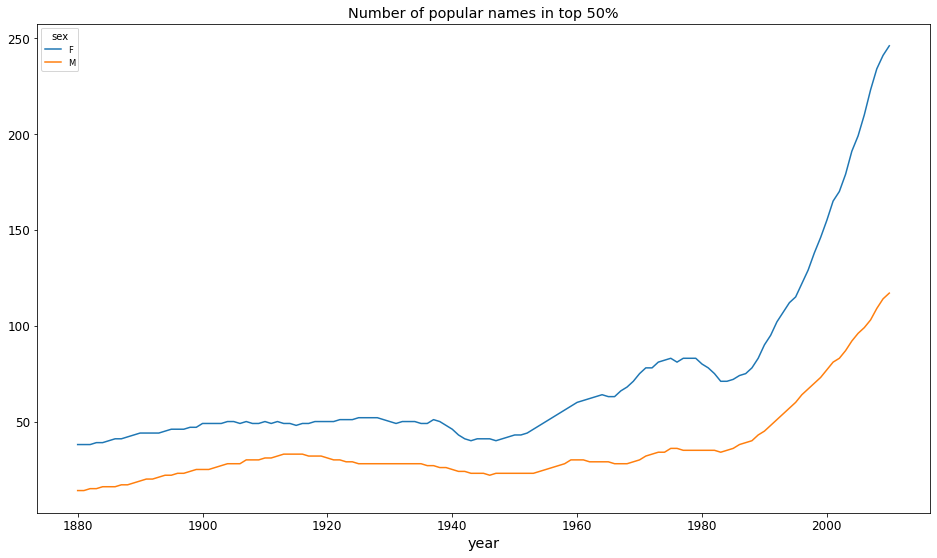

In [36]:
diversity.plot(title="Number of popular names in top 50%")

In [37]:
#The "last letter" revolution
#According to Laura Wattenberg, the distribution of boy names by last letter has changed significantly in the past 100 years.

In [38]:
#extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letters'

In [39]:
table = names.pivot_table('birth',index=last_letters,columns=['sex','year'],aggfunc='sum')

In [40]:
table

sex                 F                                                        \
year             1880     1881     1882     1883     1884     1885     1886   
last_letters                                                                  
a             31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                 NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d               609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e             33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                 7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h              4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i                61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k                13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l              2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m                58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n              3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o                30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r               481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s              1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t              2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u               380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                 NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                 NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y             10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z               106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                      ...         M                      \
year             1887     1888     1889  ...      2001      2002      2003   
last_letters                             ...                                 
a             48942.0  59440.0  58631.0  ...   39171.0   38858.0   37875.0   
b                 NaN      NaN      NaN  ...   51015.0   49335.0   48127.0   
c                 NaN      NaN      NaN  ...   27134.0   27266.0   27729.0   
d              1027.0   1298.0   1374.0  ...   60921.0   55941.0   53471.0   
e             54353.0  66748.0  66662.0  ...  145532.0  144801.0  144948.0   
f                 NaN      NaN      NaN  ...    1759.0    1818.0    1821.0   
g                25.0     44.0     28.0  ...    2155.0    2085.0    2014.0   
h              7141.0   8630.0   8825.0  ...   86088.0   88200.0   88364.0   
i               105.0    141.0    134.0  ...   21048.0   23677.0   26070.0   
j                 NaN      NaN      NaN  ...    1077.0    1088.0    1210.0   
k                19.0     21.0     22.0  ...   42500.0   42063.0   42324.0   
l              6174.0   7900.0   8395.0  ...  153847.0  153691.0  154101.0   
m                90.0    123.0    137.0  ...   42027.0   42727.0   42833.0   
n              5512.0   6832.0   7103.0  ...  616614.0  630890.0  664148.0   
o                97.0    134.0    142.0  ...   82204.0   83250.0   85500.0   
p                 NaN      NaN      NaN  ...    3421.0    3164.0    2985.0   
q                 NaN      NaN      NaN  ...     603.0     619.0     586.0   
r               910.0   1207.0   1214.0  ...  165481.0  164962.0  170025.0   
s              2803.0   3581.0   3569.0  ...  143972.0  139795.0  1388

In [41]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [42]:
subtable.head()

sex                  F                            M                    
year              1910      1960      2010     1910      1960      2010
last_letters                                                           
a             108399.0  691285.0  677176.0    977.0    5214.0   28888.0
b                  NaN     694.0     455.0    411.0    3910.0   39298.0
c                  5.0      49.0     957.0    482.0   15456.0   23360.0
d               6751.0    3732.0    2645.0  22112.0  262106.0   44856.0
e             133601.0  435009.0  316921.0  28665.0  178742.0  130325.0

In [43]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022001.0
     2010    1776223.0
M    1910     194209.0
     1960    2131990.0
     2010    1917416.0
dtype: float64

In [44]:
letter_prop = subtable/subtable.sum()

In [45]:
letter_prop

sex                  F                             M                    
year              1910      1960      2010      1910      1960      2010
last_letters                                                            
a             0.273386  0.341882  0.381245  0.005031  0.002446  0.015066
b                  NaN  0.000343  0.000256  0.002116  0.001834  0.020495
c             0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d             0.017026  0.001846  0.001489  0.113857  0.122940  0.023394
e             0.336947  0.215138  0.178424  0.147599  0.083838  0.067969
f                  NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g             0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h             0.051530  0.036223  0.075998  0.045564  0.037912  0.051821
i             0.001526  0.039963  0.031698  0.000844  0.000610  0.022672
j                  NaN       NaN  0.000093       NaN       NaN  0.000772
k             0.000121  0.000155  0.000355  0.036579  0.049374  0.018531
l             0.043187  0.033871  0.026391  0.065023  0.104892  0.070456
m             0.001200  0.008611  0.002599  0.058046  0.033831  0.024705
n             0.079237  0.130675  0.140052  0.143387  0.152513  0.362416
o             0.001672  0.002440  0.001247  0.017064  0.012841  0.042561
p             0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                  NaN       NaN  0.000030       NaN       NaN  0.000180
r             0.013395  0.006766  0.018047  0.064472  0.031044  0.087389
s             0.039036  0.012764  0.013337  0.130797  0.102699  0.065156
t             0.027432  0.015198  0.007839  0.072885  0.065646  0.022861
u             0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                  NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w             0.000020  0.000031  0.001190  0.006323  0.007707  0.016182
x             0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y             0.110975  0.152551  0.116758  0.077345  0.161003  0.058203
z             0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

Text(0.5, 0, 'last_letters')

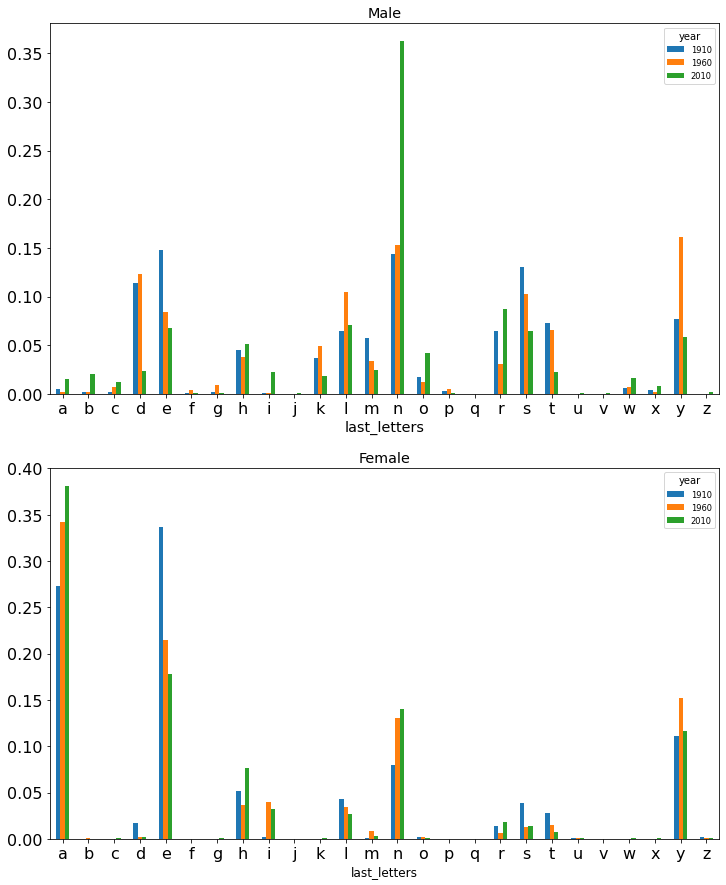

In [46]:
fig, axes = plt.subplots(2,1, figsize = (12,15))
          
letter_prop['M'].plot(kind='bar', rot =0, ax=axes[0],title='Male', fontsize=16)
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1],title='Female', fontsize=16)
plt.xlabel('last_letters',fontsize=12)
                      

In [47]:
letter_prop = table/table.sum()

In [48]:
letter_prop

sex                  F                                                    \
year              1880      1881      1882      1883      1884      1885   
last_letters                                                               
a             0.345583  0.343447  0.338776  0.341251  0.338555  0.341272   
b                  NaN       NaN       NaN       NaN       NaN       NaN   
c                  NaN       NaN  0.000046  0.000045       NaN       NaN   
d             0.006693  0.006601  0.006806  0.007212  0.007100  0.006479   
e             0.366848  0.370624  0.374595  0.373160  0.372728  0.372898   
f                  NaN       NaN       NaN       NaN       NaN       NaN   
g             0.000077  0.000054  0.000111  0.000071  0.000186  0.000083   
h             0.053443  0.052016  0.051610  0.050757  0.051171  0.049776   
i             0.000670  0.000848  0.000751  0.000677  0.000651  0.000691   
j                  NaN       NaN       NaN       NaN       NaN       NaN   
k             0.000143  0.000163  0.000102  0.000151  0.000163  0.000135   
l             0.027925  0.031647  0.032704  0.034260  0.037258  0.038661   
m             0.000637  0.000620  0.000751  0.000766  0.000612  0.000564   
n             0.033057  0.032179  0.033149  0.034153  0.034933  0.035587   
o             0.000330  0.000533  0.000325  0.000418  0.000574  0.000631   
p                  NaN       NaN       NaN       NaN       NaN       NaN   
q                  NaN       NaN       NaN       NaN       NaN       NaN   
r             0.005286  0.004535  0.005471  0.005698  0.005565  0.006005   
s             0.015287  0.014312  0.015179  0.015972  0.015796  0.015986   
t             0.023650  0.023545  0.022244  0.022739  0.021888  0.021713   
u             0.004176  0.004644  0.003802  0.003953  0.003798  0.003720   
v                  NaN       NaN       NaN       NaN       NaN       NaN   
w                  NaN  0.000054       NaN       NaN       NaN       NaN   
x                  NaN       NaN       NaN  0.000062       NaN       NaN   
y             0.115030  0.113145  0.112595  0.107399  0.107876  0.104671   
z             0.001165  0.001033  0.000983  0.001255  0.001147  0.001127   

sex                                                   ...         M            \
year              1886      1887      1888      1889  ...      2001      2002   
last_letters                                          ...                       
a             0.339715  0.335261  0.332770  0.328712  ...  0.020165  0.020019   
b                  NaN       NaN       NaN       NaN  ...  0.026263  0.025417   
c                  NaN       NaN       NaN       NaN  ...  0.013969  0.014047   
d             0.006967  0.007035  0.007267  0.007703  ...  0.031362  0.028820   
e             0.372808  0.372327  0.373683  0.373737  ...  0.074920  0.074600   
f                  NaN       NaN       NaN       NaN  ...  0.000906  0.000937   
g             0.000125  0.000171  0.000246  0.000157  ...  0.001109  0.001074   
h             0.049442  0.048917  0.048314  0.049477  ...  0.044318  0.045440   
i             0.000588  0.000719  0.000789  0.000751  ...  0.010836  0.012198   
j                  NaN       NaN       NaN       NaN  ...  0.000554  0.000561   
k             0.000187  0.000130  0.000118  0.000123  ...  0.021879  0.021670   
l             0.039583  0.042293  0.044227  0.047066  ...  0.079201  0.079180   
m             0.000713  0.000617  0.000689  0.000768  ...  0.021636  0.022012   
n             0.036269  0.037758  0.038248  0.039823  ...  0.317435  0.325027   
o             0.000643  0.000664  0.000750  0.000796  ...  0.042319  0.042889   
p                  NaN       NaN       NaN       NaN  ...  0.001761  0.001630   
q                  NaN       NaN       NaN       NaN  ...  0.000310  0.000319   
r             0.006345  0.006234  0.006757  0.006806  ...  0.085190  0.084987   
s             0.017463  0.019201  0.020048  0.020009  ...  0.074117  0.072021   
t            

In [49]:
dny_ts = letter_prop.loc[['d','n','y'], 'M'].transpose()

In [50]:
dny_ts

last_letters,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408
...,...,...,...
2006,0.025092,0.351624,0.060351
2007,0.024479,0.358212,0.059643
2008,0.023589,0.361014,0.060361


<AxesSubplot:xlabel='year'>

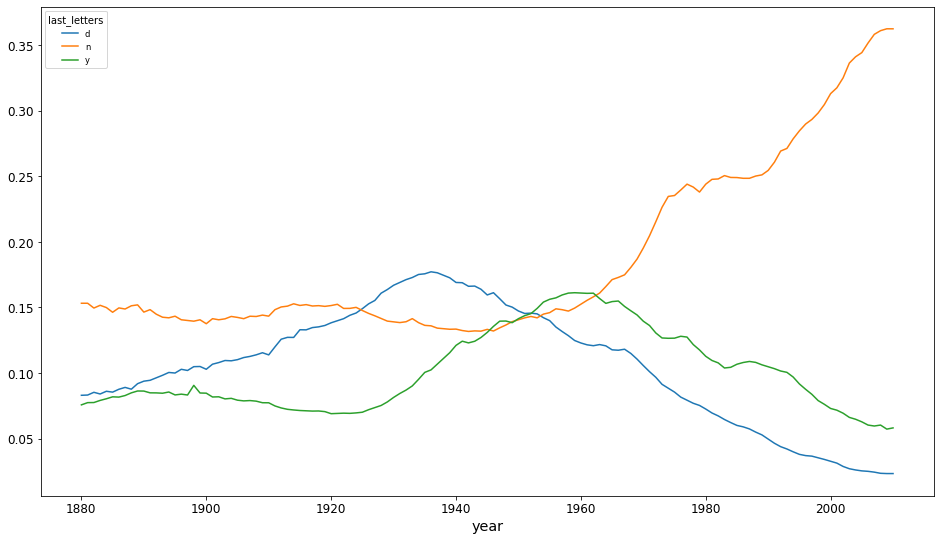

In [51]:
dny_ts.plot()

## **Boy names have become girl names (and vice versa)** ##

* Some names that were popular among one sex earlier have become more popular with the other sex recently
* One example is the boy names Lesly or Leslie. We'll make a list of names that contain 'lesly'

In [52]:
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [53]:
unique_name = pd.Series(top1000.name.unique())

In [63]:
unique_name

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6865       Daylen
6866        Masen
6867        Rowen
6868       Yousef
6869       Joziah
Length: 6870, dtype: object

In [55]:
lesl_like=unique_name[unique_name.str.lower().str.contains('lesl')]

In [56]:
lesl_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

In [57]:
filtered = top1000[top1000.name.isin(lesl_like)]

In [58]:
filtered.groupby('name').birth.sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    370581
Lesly      10072
Name: birth, dtype: int64

In [59]:
#Aggregate by sex and normalize with year
table = filtered.pivot_table('birth',index='year',columns='sex',aggfunc='sum')

In [60]:
table = table.div(table.sum(1), axis=0)

In [61]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

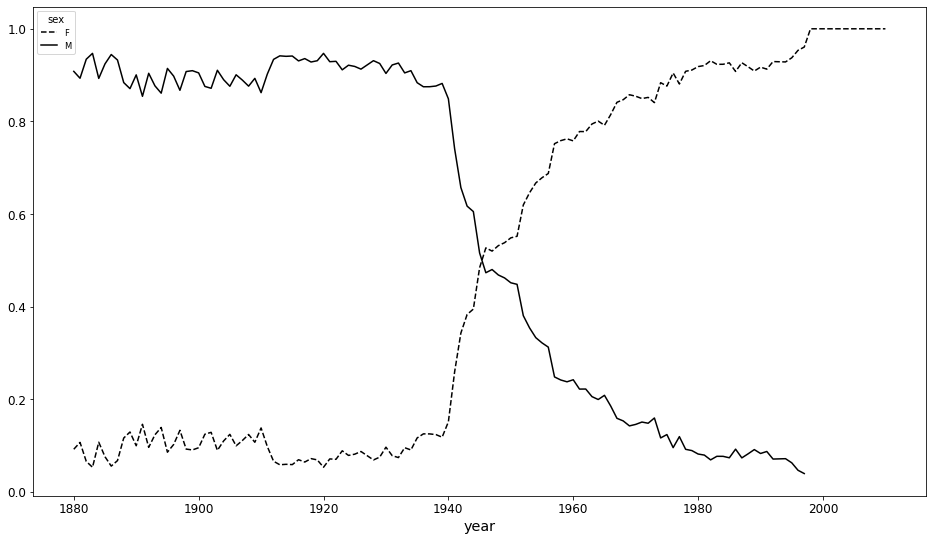

In [65]:
table.plot(style={'M':'k-', 'F':'k--'})